In [6]:
!pip install -qU langchain_community
!pip install pdfplumber
!pip install sentence_transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 8.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.9 MB/s eta 0:00:0000:0100:01


In [7]:
import re
from langchain_community.document_loaders import PDFPlumberLoader
import json
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
null = None


In [8]:
pdf_path = "/kaggle/input/test-res-regex/Steve Sun - Resume (2).pdf"

In [9]:
def extract_text_pdf(pdf_path):
        loader = PDFPlumberLoader(pdf_path)
        docs = loader.load()
        text = ''
        for doc in docs:
            text += doc.page_content # Append extracted text
        return text 


def extract_name_from_resume(text):
    name = None

    # Use regex pattern to find a potential name
    pattern = r"(\b[A-Z][a-z]+\b)\s(\b[A-Z][a-z]+\b)"
    match = re.search(pattern, text)
    if match:
        name = match.group()

    return name

def extract_email_from_resume(text):
    email = None

    # Use regex pattern to find a potential email address
    pattern = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b"
    match = re.search(pattern, text)
    if match:
        email = match.group()

    return email


def extract_skills_from_resume(text, skills_list):
    skills = []

    # Search for skills in the resume text
    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills.append(skill)

    return skills


def extract_education_details(text):

    pattern = r"(?P<university>[\w\s,&]+(?:University|College|Institute|Academy))\n(?P<degree>.+?)\s(?:-\s(?P<gpa>\d\.\d{1,2}\sGPA))?\s(?P<start_date>\w+\s\d{4})\s(?:[-–]\s(?P<end_date>\w+\s\d{4}))?"

    matches = re.finditer(pattern, text)
    
    education_dict = {
        "University": [],
        "Degree": [],
        "GPA": [],
        "Start Date": [],
        "End Date": [],
    }
    
    # Extract and organize data
    for match in matches:
        education_dict["University"].append(match.group("university").strip())
        education_dict["Degree"].append(match.group("degree").strip())
        education_dict["GPA"].append(match.group("gpa").strip() if match.group("gpa") else "N/A")
        education_dict["Start Date"].append(match.group("start_date").strip())
        education_dict["End Date"].append(match.group("end_date").strip() if match.group("end_date") else "Present")
    
    return education_dict


def extracting_experirnce(text):
        
    matches = re.search(pattern, text, re.DOTALL)
    
    if matches:
        work = matches.group(1).strip()
        return work


In [10]:
text = extract_text_pdf(pdf_path)
skills_list = ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Project Management', 'Deep Learning', 'SQL', 'Tableau','AI',
'Data Visualization','Statistical Analysis','Big Data','Cloud Technologies''Problem-Solving','Critical Thinking',
'Storytelling']
pattern = r"WORK EXPERIENCE\n(.*?)\nEDUCATION"

# below is the general pattern for the experience extraction
# pattern =  r"(?i)(work\s*experience|professional\s*experience|employment\s*history)[\s\S]*?(?=(education|skills|projects|$))"

In [11]:
output = {
    "Name": extract_name_from_resume(text),
    "Email": extract_email_from_resume(text),
    "Skills":extract_skills_from_resume(text, skills_list),
    "Education": extract_education_details(text),
    "Experience": extracting_experirnce(text),
}

In [12]:
print(output)

{'Name': 'Steve Sun', 'Email': 'stevesun1245@gmail.com', 'Skills': ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Deep Learning', 'SQL', 'AI', 'Data Visualization', 'Statistical Analysis', 'Big Data', 'Critical Thinking', 'Storytelling'], 'Education': {'University': ['EDUCATION\nSkyline University'], 'Degree': ['Master of Science in Data Science'], 'GPA': ['3.81 GPA'], 'Start Date': ['August 2018'], 'End Date': ['May 2020']}, 'Experience': 'DataNova Insights\nData Scientist March 2021 – Present\n• Developed and deployed machine learning models to optimize customer retention, increasing\nengagement by 15%.\n• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business\ninsights.\n• Built scalable ETL pipelines to process large datasets using Python and SQL.\n• Collaborated with cross-functional teams to improve decision-making through predictive analytics.\nNeural Sphere Labs\nData Scientist June 2019 – December 2023\n• Designed and

In [14]:
with open('resume_data.json', 'w') as json_file:
    json.dump(output, json_file, indent=4)

In [15]:
with open('resume_data.json', 'r') as json_file:
    resume_data = json.load(json_file)

# If the resume ranker expects a list of dictionaries, wrap the dictionary in a list
resume_data_list = [resume_data]

In [16]:
print(resume_data_list)

[{'Name': 'Steve Sun', 'Email': 'stevesun1245@gmail.com', 'Skills': ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Deep Learning', 'SQL', 'AI', 'Data Visualization', 'Statistical Analysis', 'Big Data', 'Critical Thinking', 'Storytelling'], 'Education': {'University': ['EDUCATION\nSkyline University'], 'Degree': ['Master of Science in Data Science'], 'GPA': ['3.81 GPA'], 'Start Date': ['August 2018'], 'End Date': ['May 2020']}, 'Experience': 'DataNova Insights\nData Scientist March 2021 – Present\n• Developed and deployed machine learning models to optimize customer retention, increasing\nengagement by 15%.\n• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business\ninsights.\n• Built scalable ETL pipelines to process large datasets using Python and SQL.\n• Collaborated with cross-functional teams to improve decision-making through predictive analytics.\nNeural Sphere Labs\nData Scientist June 2019 – December 2023\n• Designed an

In [4]:
# Job description for matching
job_description = """Looking for a candidate with expertise in Python, Machine Learning, NLP, and SQL. 
Must have experience in building predictive models and working with large datasets."""

In [17]:
resumes = resume_data_list

In [19]:
# Function Definitions

def normalize_text(data):
    """
    Recursively extract and combine text from nested dictionaries and lists.
    """
    if isinstance(data, str):
        return data
    elif isinstance(data, list):
        return " ".join(normalize_text(item) for item in data)
    elif isinstance(data, dict):
        return " ".join(normalize_text(value) for value in data.values())
    else:
        return str(data)

def match_resume_to_job(resume_text, job_description, model):
    """
    Compute similarity between resume text and job description using a sentence-transformer model.
    """
    embeddings = model.encode([resume_text, job_description], convert_to_tensor=True)
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

def compute_skill_match(skills, job_description):
    """
    Compute the percentage of skills that match the job description.
    """
    matched_skills = [skill for skill in skills if skill.lower() in job_description.lower()]
    return len(matched_skills) / len(skills) if skills else 0

In [20]:
def rank_candidates(resumes, job_description, model):
    """
    Rank candidates based on similarity scores for skills, education, and experience.
    """
    scores = []

    for resume in resumes:
        skills_text = normalize_text(resume.get("Skills", []))
        print(skills_text)
        experience_text = normalize_text(resume.get("Experience", {}))
        print(experience_text)
        education_text = normalize_text(resume.get("Education", {}))


        # Compute similarity scores
        skill_score = match_resume_to_job(skills_text, job_description, model)
        print(skill_score)
        experience_score = match_resume_to_job(experience_text, job_description, model)
        education_score = match_resume_to_job(education_text, job_description, model)
        keyword_match_score = compute_skill_match(resume.get("Skills", []), job_description)

        # Weighted total score
        total_score = 0.5 * skill_score + 0.4 * experience_score + 0.1 * education_score + 0.1 * keyword_match_score

        # Collect scores
        scores.append({
            "Name": resume.get("Name") or resume["Contact Information"]["Name"],
            "Skill Score": skill_score,
            "Experience Score": experience_score,
            "Education Score": education_score,
            "Keyword Match Score": keyword_match_score,
            "Total Score": total_score
        })

    return sorted(scores, key=lambda x: x["Total Score"], reverse=True)


In [67]:
def plot_scores(ranked_candidates):
    """
    Visualize the scores of candidates using a bar chart.
    """
    names = [candidate['Name'] for candidate in ranked_candidates]
    skill_scores = [candidate['Skill Score'] for candidate in ranked_candidates]
    experience_scores = [candidate['Experience Score'] for candidate in ranked_candidates]
    education_scores = [candidate['Education Score'] for candidate in ranked_candidates]
    keyword_match_scores = [candidate['Keyword Match Score'] for candidate in ranked_candidates]

    # Plot setup
    bar_width = 0.2
    index = range(len(names))

    # Create bars for each category
    plt.bar(index, skill_scores, bar_width, label="Skills")
    plt.bar([i + bar_width for i in index], experience_scores, bar_width, label="Experience")
    plt.bar([i + 2 * bar_width for i in index], education_scores, bar_width, label="Education")
    plt.bar([i + 3 * bar_width for i in index], keyword_match_scores, bar_width, label="Keyword Match")

    # Configure plot details
    plt.xticks([i + 1.5 * bar_width for i in index], names)
    plt.xlabel("Candidates")
    plt.ylabel("Scores")
    plt.title("Candidate Comparison")
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


In [22]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [42]:
ranked_candidates = rank_candidates(resumes, job_description, model)

Python Data Analysis Machine Learning Communication Deep Learning SQL AI Data Visualization Statistical Analysis Big Data Critical Thinking Storytelling
DataNova Insights
Data Scientist March 2021 – Present
• Developed and deployed machine learning models to optimize customer retention, increasing
engagement by 15%.
• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business
insights.
• Built scalable ETL pipelines to process large datasets using Python and SQL.
• Collaborated with cross-functional teams to improve decision-making through predictive analytics.
Neural Sphere Labs
Data Scientist June 2019 – December 2023
• Designed and implemented deep learning models for image classification, improving accuracy by
20%.
• Automated data preprocessing and feature engineering workflows using Python and Pandas.
• Created interactive dashboards in Power BI to visualize key performance indicators (KPIs).
• Partnered with engineers to deploy ML models into

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5235879421234131


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
# Display ranked candidates
for candidate in ranked_candidates:
    print(f"Name: {candidate['Name']}")
    print(f"Skill Score: {candidate['Skill Score']:.2f}")
    print(f"Experience Score: {candidate['Experience Score']:.2f}")
    print(f"Education Score: {candidate['Education Score']:.2f}")
    print(f"Total Score: {candidate['Total Score']:.2f}")
    print("-" * 30)  # Separator for readability

Name: Steve Sun
Skill Score: 0.52
Experience Score: 0.62
Education Score: 0.40
Total Score: 0.57
------------------------------


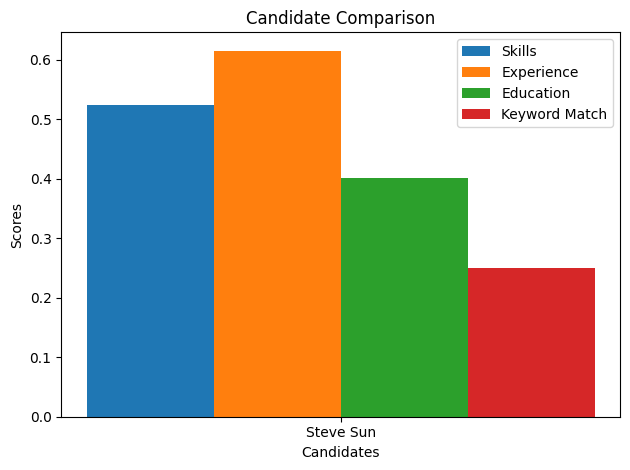

In [68]:
plot_scores(ranked_candidates)
